In [12]:
#version->0.21.0
import mlxtend
mlxtend.__version__

'0.21.0'

In [13]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
#import mlrose
from mlxtend.classifier import StackingClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [14]:
from sklearn.model_selection import cross_val_predict
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

In [15]:
x = np.genfromtxt('preprocessed_x_bathroom.csv', delimiter=',')
y = np.genfromtxt('preprocessed_y_bathroom.csv', delimiter=',', dtype= None)

In [31]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators = 200)
adb = AdaBoostClassifier(base_estimator = RandomForestClassifier(), n_estimators=50, learning_rate=1.0, 
                         algorithm='SAMME.R', random_state=None)
#gb = GradientBoostingClassifier()
hgb=HistGradientBoostingClassifier(max_iter=100)
xgb = XGBClassifier(n_estimators=200)
lr = LogisticRegression()

In [17]:
sclf = StackingClassifier(classifiers=[dt,rf,adb,hgb,xgb],
                          use_probas=True,
                          average_probas=False,
                          meta_classifier=lr)

In [19]:
feature_names=[]
for names in y:
  if names not in feature_names:
    feature_names.append(names)
#feature_names

Ensemble, splits= 3
                   precision    recall  f1-score   support

       b'driving'       0.70      0.42      0.53       130
        b'eating'       0.38      0.25      0.30       153
         b'lying'       0.73      0.39      0.51       183
       b'sitting'       0.62      0.74      0.67       642
b'using_computer'       0.78      0.89      0.83       828
       b'walking'       0.84      0.33      0.48        96

         accuracy                           0.69      2032
        macro avg       0.67      0.51      0.55      2032
     weighted avg       0.69      0.69      0.68      2032



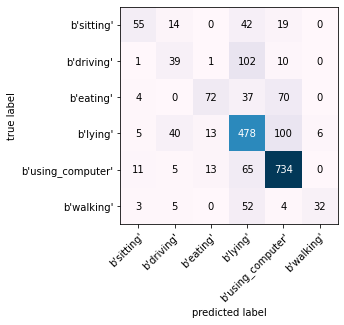

Ensemble, splits= 4
                   precision    recall  f1-score   support

       b'driving'       0.74      0.46      0.57       130
        b'eating'       0.48      0.20      0.28       153
         b'lying'       0.73      0.42      0.53       183
       b'sitting'       0.62      0.79      0.69       642
b'using_computer'       0.80      0.90      0.85       828
       b'walking'       0.73      0.31      0.44        96

         accuracy                           0.71      2032
        macro avg       0.69      0.51      0.56      2032
     weighted avg       0.71      0.71      0.69      2032



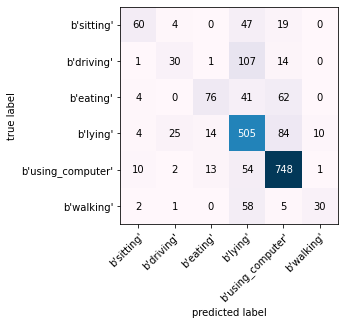

Ensemble, splits= 5
                   precision    recall  f1-score   support

       b'driving'       0.73      0.43      0.54       130
        b'eating'       0.52      0.21      0.30       153
         b'lying'       0.74      0.40      0.52       183
       b'sitting'       0.63      0.82      0.71       642
b'using_computer'       0.81      0.90      0.85       828
       b'walking'       0.90      0.36      0.52        96

         accuracy                           0.72      2032
        macro avg       0.72      0.52      0.57      2032
     weighted avg       0.72      0.72      0.70      2032



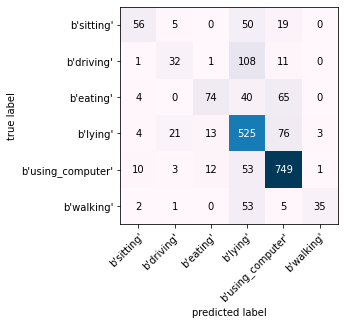

Ensemble, splits= 6
                   precision    recall  f1-score   support

       b'driving'       0.74      0.45      0.56       130
        b'eating'       0.50      0.20      0.28       153
         b'lying'       0.74      0.42      0.54       183
       b'sitting'       0.62      0.80      0.70       642
b'using_computer'       0.81      0.90      0.85       828
       b'walking'       0.87      0.42      0.56        96

         accuracy                           0.72      2032
        macro avg       0.72      0.53      0.58      2032
     weighted avg       0.72      0.72      0.70      2032



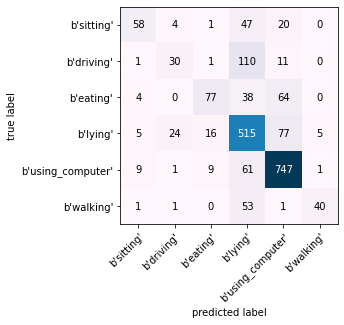

Ensemble, splits= 7
                   precision    recall  f1-score   support

       b'driving'       0.77      0.45      0.57       130
        b'eating'       0.48      0.21      0.29       153
         b'lying'       0.71      0.42      0.53       183
       b'sitting'       0.63      0.81      0.71       642
b'using_computer'       0.82      0.91      0.86       828
       b'walking'       0.89      0.43      0.58        96

         accuracy                           0.73      2032
        macro avg       0.72      0.54      0.59      2032
     weighted avg       0.72      0.73      0.71      2032



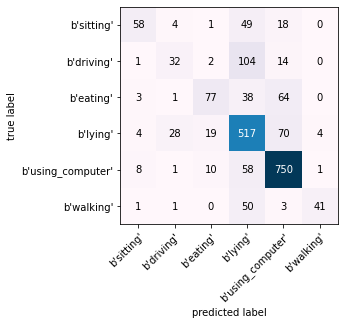

In [21]:

fin_pred = cross_val_predict(sclf, x, y, cv=5)

print("Ensemble")
print(classification_report(y, fin_pred))

cm = confusion_matrix(y_target=y
                    ,y_predicted=fin_pred 
                    ,binary=False)
                    
fig,ax=plot_confusion_matrix(conf_mat=cm
                            ,show_absolute=True
                            ,show_normed=False
                            ,colorbar=False
                            ,class_names=feature_names
                            #,cmap='PuBu'
                            ,fontcolor_threshold=0.6
                            )
plt.show()